In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('../Datasets/monthly-milk-production-pounds-p.csv', index_col =0)
y = df['Milk']
y.shape

(168,)

In [4]:
y_train = y.iloc[:-12]
y_test = y.iloc[-12:]
y_train.shape, y_test.shape

((156,), (12,))

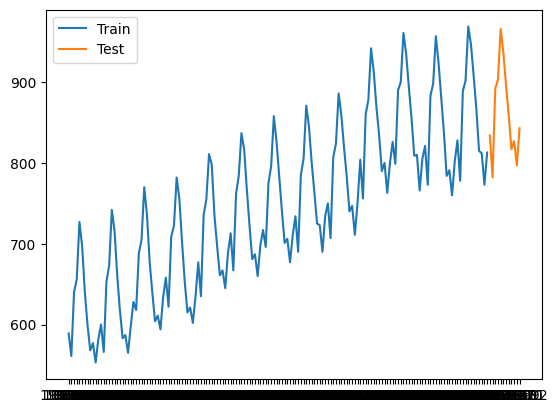

In [5]:
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.legend()

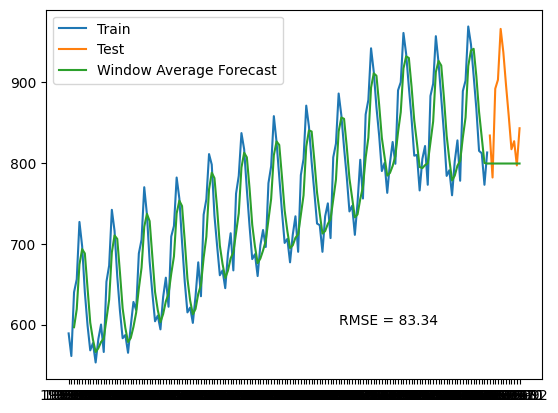

In [6]:
from sklearn.metrics import mean_squared_error as mse
span = 3
fcast = y_train.rolling(3).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Window Average Forecast')
rmse = np.sqrt(mse(y_test, MA_series))
plt.text(100, 600, 'RMSE = ' + str(np.round(rmse, 2)))
plt.legend(loc='best')

In [7]:
spans = np.arange(3, 20)
rmses = []

for i in spans:
    fcast = y_train.rolling(i).mean()
    MA = fcast.iloc[-1]
    MA_series = pd.Series(MA.repeat(len(y_test)))
    MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
    rmse = np.sqrt(mse(y_test, MA_series))
    rmses.append(rmse)

print('Best rmse : ', np.min(rmses))
print('Best no of span : ', spans[np.argmin(rmses)])

Best rmse :  54.16794870277687
Best no of span :  8


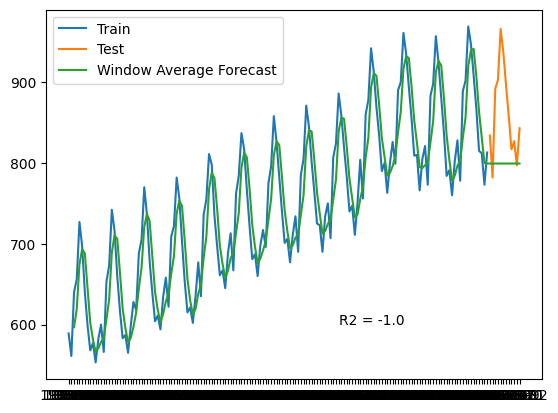

In [8]:
from sklearn.metrics import r2_score
span = 3
fcast = y_train.rolling(3).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Window Average Forecast')
r2 = r2_score(y_test, MA_series)
plt.text(100, 600, 'R2 = ' + str(np.round(r2)))
plt.legend(loc='best')

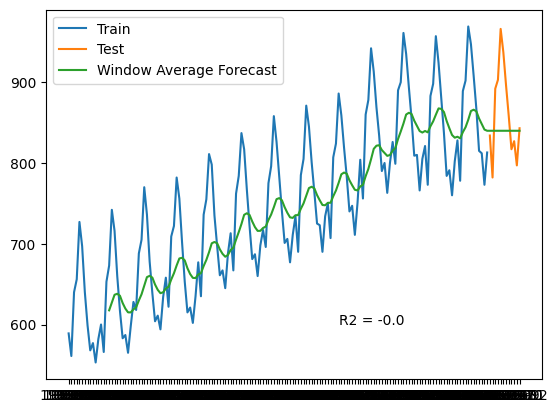

In [9]:
from sklearn.metrics import r2_score
span = 8
fcast = y_train.rolling(16).mean()
MA = fcast.iloc[-1]
MA_series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast, MA_series], ignore_index=True)
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(MA_fcast, label='Window Average Forecast')
r2 = r2_score(y_test, MA_series)
plt.text(100, 600, 'R2 = ' + str(np.round(r2)))
plt.legend(loc='best')

### Centered Rolling Mean

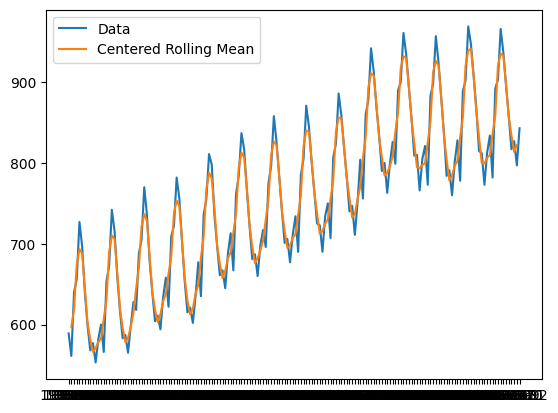

In [10]:
span = 3
fcast = y.rolling(span, center=True).mean()
plt.plot(y, label='Data')
plt.plot(fcast, label='Centered Rolling Mean')
plt.legend(loc='best')